In [1]:
%matplotlib ipympl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from script.tool import ROOT_NFS_TEST, standardize_feature

In [2]:
df_pd = pd.read_csv(ROOT_NFS_TEST / 'feature_map/vit_b_p16_224_last_hidden_trained_lr2e_05.csv')
filter_classes = df_pd['classes'].unique()[:10]

In [10]:
from sklearn.decomposition import PCA

class PlotPCA:
    def __init__(self, n_components=3):
        self.n_components = n_components
        self.pca = PCA(n_components=3)
        
    def transform_data(self, filter_classes, data_name, data_path=ROOT_NFS_TEST / "feature_map"):
        df_pd = pd.read_csv(data_path / data_name)
        index_filter_class = df_pd["classes"].isin(filter_classes)
        X = df_pd.loc[index_filter_class].iloc[:, :-1].values
        X = standardize_feature(X)
        y = df_pd.loc[index_filter_class].iloc[:, -1].values
        self.reduced_data = self.pca.fit_transform(X)
        
    def get_explained_variance_ratio(self):
        return self.pca.explained_variance_ratio_
    
    def plot_3d(self):
        x_plot = self.reduced_data[:, 0]
        y_plot = self.reduced_data[:, 1]
        z_plot = self.reduced_data[:, 2]
        
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        for g in filter_classes:
            ix = np.where(df_pd['classes'] == g)
            ax.scatter(x_plot[ix], y_plot[ix], z_plot[ix], label = g, s = 100)
        ax.legend()
        plt.show()

[0.10086813 0.06918357 0.06225187]


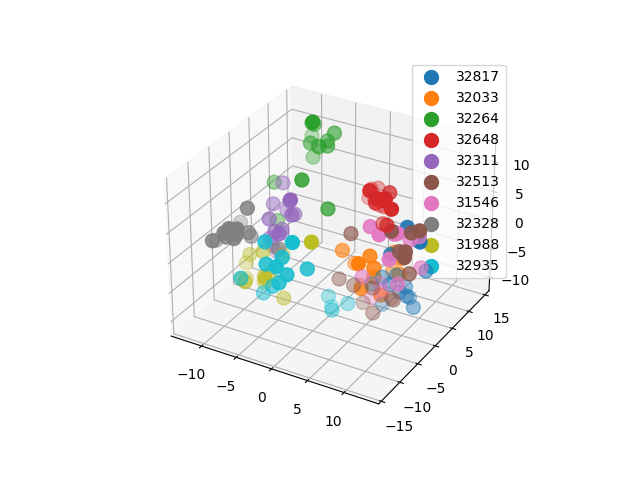

In [6]:
# last_hidden_trained_lr2e_05
last_hidden_trained_lr2e_05 = PlotPCA()
last_hidden_trained_lr2e_05.transform_data(filter_classes, 'vit_b_p16_224_last_hidden_trained_lr2e_05.csv')
print(last_hidden_trained_lr2e_05.get_explained_variance_ratio())
last_hidden_trained_lr2e_05.plot_3d()

[0.12155311 0.08222844 0.07228935]


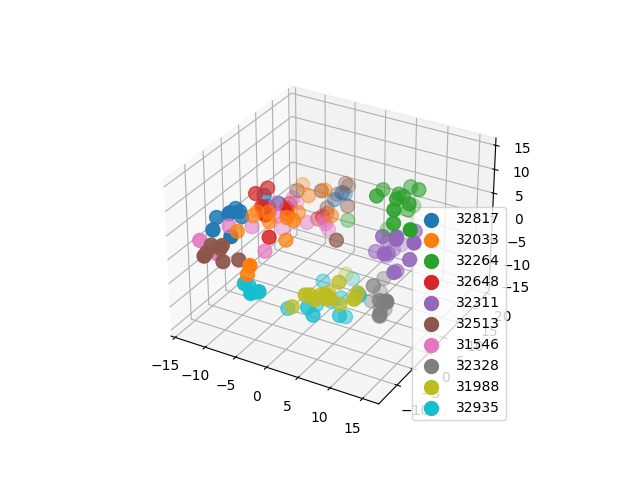

In [12]:
# last_hidden_trained_lr2e_05
last_hidden_trained_lr2e_05 = PlotPCA()
last_hidden_trained_lr2e_05.transform_data(filter_classes, 'vit_b_p16_224_last_hidden_trained_lr2e_05_cos.csv')
print(last_hidden_trained_lr2e_05.get_explained_variance_ratio())
last_hidden_trained_lr2e_05.plot_3d()

[0.26488799 0.09212232 0.08197692]


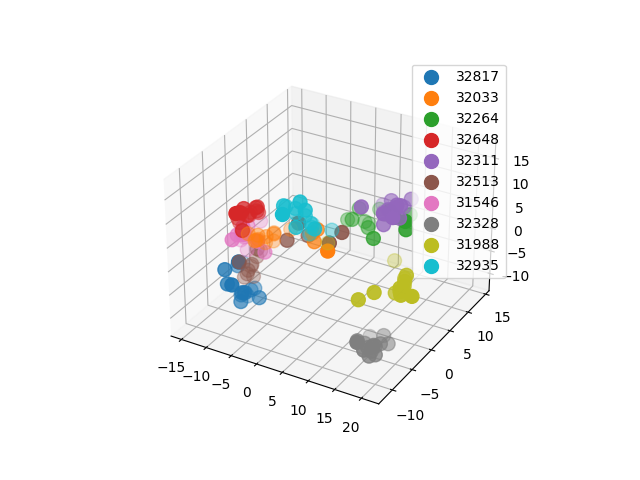

In [15]:
# vit_b_p16_224_last_hidden_trained_lr2e_05_eu_9ep_0_95099acc
vit_b_p16_224_last_hidden_trained_lr2e_05_eu_9ep_0_95099acc = PlotPCA()
vit_b_p16_224_last_hidden_trained_lr2e_05_eu_9ep_0_95099acc.transform_data(filter_classes, 
    'vit_b_p16_224_last_hidden_trained_lr2e_05_eu_9ep_0_95099acc.csv')
print(vit_b_p16_224_last_hidden_trained_lr2e_05_eu_9ep_0_95099acc.get_explained_variance_ratio())
vit_b_p16_224_last_hidden_trained_lr2e_05_eu_9ep_0_95099acc.plot_3d()

[0.1034956  0.0823474  0.06309748]


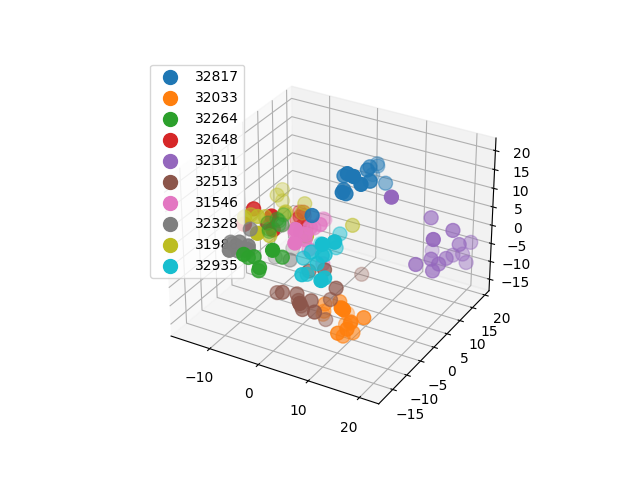

In [16]:
# efficientnet_b1
efficientnet_b1 = PlotPCA()
efficientnet_b1.transform_data(filter_classes, 'efficientnet_b1.csv')
print(efficientnet_b1.get_explained_variance_ratio())
efficientnet_b1.plot_3d()